In [1]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

In [2]:
nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godz7\AppData\Roaming\nltk_data...


In [4]:
# Load .env enviroment variables
load_dotenv()


# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

api = tradeapi.REST('PKYSIX5VD8DLHIZOILZS', 'Yv4AYGCNo9puqbXGPq2zF1sNrzy63CWCrWNJnOse', api_version='v2')

In [5]:
def stock_info_grab(ticker):
    """
    Takes ticker symbol and returns DataFrame with Date, Close, and Pct Change columns.
    """
    # Set timeframe to '1D'
    timeframe = "1D"

    # Set current date and the date from one month ago using the ISO format
    current_date = pd.Timestamp("2020-11-09", tz="America/New_York").isoformat()
    past_date = pd.Timestamp("2016-08-27", tz="America/New_York").isoformat()

    df = api.get_barset(
        ticker,
        timeframe,
        limit=None,
        start=past_date,
        end=current_date,
        after=None,
        until=None,
    ).df
    df = df.droplevel(axis=1, level=0)
    df.index = df.index.date
    df['pct change'] = df['close'].pct_change()
    df['pct change'].dropna
    df = df.reset_index()
    df = df.drop(columns=['open', 'high', 'low', 'volume'])
    df = df.rename(columns={'index':'Date'})
    df = df.set_index('Date')
    return df

In [6]:
aapl_stock_info = stock_info_grab("AAPL")
amzn_stock_info = stock_info_grab("AMZN")
tsla_stock_info = stock_info_grab("TSLA")
spy_stock_info = stock_info_grab("SPY")
aapl_stock_info

,close,pct change
Date,,
2016-08-29,106.8200,NaN
2016-08-30,105.9900,-0.007770
2016-08-31,106.1100,0.001132
2016-09-01,106.7300,0.005843
2016-09-02,107.7300,0.009369
2016-09-06,107.7000,-0.000278
2016-09-07,108.3700,0.006221
2016-09-08,105.5100,-0.026391
2016-09-09,103.1400,-0.022462


In [6]:
aapl_file = Path('../Resources/AAPL_HEADLINES.csv')
#amzn_file = Path('../Resources/AMZN_HEADLINES.csv')
spy_file = Path('../Resources/SPY_HEADLINES.csv')
tsla_file = Path('../Resources/TSLA_HEADLINES.csv')

aapl_headlines_df = pd.read_csv(aapl_file)
#amzn_headlines_df = pd.read_csv(amzn_file)
spy_headlines_df = pd.read_csv(spy_file)
tsla_headlines_df = pd.read_csv(tsla_file)

#aapl_headlines['Date'] = pd.to_datetime(aapl_headlines['Date']).dt.strftime('%Y-%m-%d')
#aapl_headlines = aapl_headlines.set_index('Date')
aapl_headlines_df

,Headline,Date
0,"Apple Inc. stock falls Monday, underperforms m...","Nov. 9, 2020 at 4:30 p.m. ET"
1,Big Tech Stocks Are Lagging Today. Why They’ll...,"Nov. 9, 2020 at 1:45 p.m. ET"
2,"As Apple releases its new line of Macs, the bi...","Nov. 9, 2020 at 1:18 p.m. ET"
3,"In the Midst of Election Uncertainty, Younger ...","Nov. 6, 2020 at 9:21 p.m. ET"
4,Berkshire Buybacks Hit Record $9 Billion in Th...,"Nov. 7, 2020 at 8:49 a.m. ET"
...,...,...
9868,Respect for America has climbed during the Oba...,"Aug. 29, 2016 at 11:47 a.m. ET"
9869,"Fitbit upgrades now track yoga, weightlifting ...","Aug. 29, 2016 at 9:41 a.m. ET"
9870,5 things Tim Cook has done better at Apple tha...,"Aug. 28, 2016 at 9:15 p.m. ET"
9871,Want to invest in self-driving cars? Check out...,"Aug. 27, 2016 at 11:02 a.m. ET"


In [7]:
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [8]:
def create_sentiment_df(df):
    """
    Takes headlines DataFrame & creates DataFrame with Sentiment columns.
    Splits Date & Time, creates Time column and moves Date to Index.
    """
    title_sent = {
        "compound": [],
        "positive": [],
        "neutral": [],
        "negative": [],
        "sentiment": [],
    }

    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["Headline"])
            title_sent["compound"].append(title_sentiment["compound"])
            title_sent["positive"].append(title_sentiment["pos"])
            title_sent["neutral"].append(title_sentiment["neu"])
            title_sent["negative"].append(title_sentiment["neg"])
            title_sent["sentiment"].append(get_sentiment(title_sentiment["compound"]))
        except AttributeError:
            pass

    title_sent_df = pd.DataFrame(title_sent)
    #title_sent_df.head()

    headline_sentiment_df = df.join(title_sent_df)
    headline_sentiment_df.dropna()
    headline_sentiment_df['Date'] = headline_sentiment_df['Date'].str.replace('at','-')
    headline_sentiment_df['Date'] = headline_sentiment_df['Date'].str.split('-').str[0]
    headline_sentiment_df = headline_sentiment_df.reindex(columns=['Date', 'Headline', 'compound', 'positive', 'neutral', 'negative', 'sentiment'])
    headline_sentiment_df['Date'] = pd.to_datetime(headline_sentiment_df['Date'])
    headline_sentiment_df.set_index('Date')
    return headline_sentiment_df

In [9]:
aapl_headlines = create_sentiment_df(aapl_headlines_df)
#amzn_headlines = create_sentiment_df(amzn_headlines_df)
tsla_headlines = create_sentiment_df(tsla_headlines_df)
spy_headlines = create_sentiment_df(spy_headlines_df)
aapl_headlines

,Date,Headline,compound,positive,neutral,negative,sentiment
0,2020-11-09,"Apple Inc. stock falls Monday, underperforms m...",0.0000,0.000,1.000,0.000,0
1,2020-11-09,Big Tech Stocks Are Lagging Today. Why They’ll...,-0.0772,0.121,0.738,0.141,-1
2,2020-11-09,"As Apple releases its new line of Macs, the bi...",0.4767,0.193,0.807,0.000,1
3,2020-11-06,"In the Midst of Election Uncertainty, Younger ...",-0.3400,0.000,0.806,0.194,-1
4,2020-11-07,Berkshire Buybacks Hit Record $9 Billion in Th...,-0.1531,0.000,0.882,0.118,-1
...,...,...,...,...,...,...,...
9868,2016-08-29,Respect for America has climbed during the Oba...,0.4767,0.279,0.721,0.000,1
9869,2016-08-29,"Fitbit upgrades now track yoga, weightlifting ...",0.0000,0.000,1.000,0.000,0
9870,2016-08-28,5 things Tim Cook has done better at Apple tha...,0.4404,0.209,0.791,0.000,1
9871,2016-08-27,Want to invest in self-driving cars? Check out...,0.0772,0.126,0.874,0.000,1


In [10]:
# find average sentiment score by date
aapl_scores = aapl_headlines.groupby('Date').mean().sort_values(by='Date')
#amzn_scores = amzn_headlines.groupby(['Date']).mean().sort_values(by='Date')
tsla_scores = tsla_headlines.groupby(['Date']).mean().sort_values(by='Date')
spy_scores = spy_headlines.groupby(['Date']).mean().sort_values(by='Date')

In [11]:
aapl_scores.head()

,compound,positive,neutral,negative,sentiment
Date,,,,,
2016-03-19,0.836000,0.530000,0.470000,0.000000,1.000000
2016-08-27,0.038600,0.063000,0.937000,0.000000,0.500000
2016-08-28,0.440400,0.209000,0.791000,0.000000,1.000000
2016-08-29,0.067100,0.102000,0.842286,0.055714,0.000000
2016-08-30,-0.015205,0.061591,0.883455,0.054955,-0.090909


In [12]:
aapl_scores = aapl_scores[['positive', 'neutral', 'negative', 'sentiment']]
#amzn_scores = amzn_scores[['positive', 'neutral', 'negative', 'sentiment']]
tsla_scores = tsla_scores[['positive', 'neutral', 'negative', 'sentiment']]
spy_scores = spy_scores[['positive', 'neutral', 'negative', 'sentiment']]
aapl_scores

,positive,neutral,negative,sentiment
Date,,,,
2016-03-19,0.530000,0.470000,0.000000,1.000000
2016-08-27,0.063000,0.937000,0.000000,0.500000
2016-08-28,0.209000,0.791000,0.000000,1.000000
2016-08-29,0.102000,0.842286,0.055714,0.000000
2016-08-30,0.061591,0.883455,0.054955,-0.090909
...,...,...,...,...
2020-11-04,0.078900,0.800900,0.120300,-0.300000
2020-11-05,0.202333,0.747333,0.050333,0.333333
2020-11-06,0.054833,0.845500,0.099500,-0.500000


In [13]:
# sent scores distribution across each df poss use histogram, calc meanstd, or percentiles 
aapl_complete = pd.concat([aapl_scores,aapl_stock_info], join='outer', axis=1).dropna()
#amzn_complete = pd.concat([amzn_scores,amzn_stock_info], join='outer', axis=1).dropna()
tsla_complete = pd.concat([tsla_scores,tsla_stock_info], join='outer', axis=1).dropna()
spy_complete = pd.concat([spy_scores,spy_stock_info], join='outer', axis=1).dropna()
aapl_complete

,positive,neutral,negative,sentiment,close,pct change
Date,,,,,,
2016-08-30,0.061591,0.883455,0.054955,-0.090909,105.990,-0.007770
2016-08-31,0.070400,0.818600,0.111000,-0.200000,106.110,0.001132
2016-09-01,0.069625,0.897625,0.032750,0.125000,106.730,0.005843
2016-09-02,0.063143,0.845429,0.091429,-0.285714,107.730,0.009369
2016-09-06,0.131750,0.804500,0.063750,0.250000,107.700,-0.000278
...,...,...,...,...,...,...
2020-11-03,0.119000,0.842000,0.038833,0.500000,110.375,0.014756
2020-11-04,0.078900,0.800900,0.120300,-0.300000,114.940,0.041359
2020-11-05,0.202333,0.747333,0.050333,0.333333,118.990,0.035236


In [14]:
# TO DO: shift aapl_complete['pct change'] one day on all dfs
# TO DO: dropna() on all df['predicted pct change'] cols 
aapl_complete['predicted pct change'] = aapl_complete['pct change'].shift(periods=-1)
#amzn_complete['predicted pct change'] = amzn_complete['pct change'].shift(periods=-1)
tsla_complete['predicted pct change'] = tsla_complete['pct change'].shift(periods=-1)
spy_complete['predicted pct change'] = spy_complete['pct change'].shift(periods=-1)


In [15]:
df = aapl_complete

In [16]:
df

,positive,neutral,negative,sentiment,close,pct change,predicted pct change
Date,,,,,,,
2016-08-30,0.061591,0.883455,0.054955,-0.090909,105.990,-0.007770,0.001132
2016-08-31,0.070400,0.818600,0.111000,-0.200000,106.110,0.001132,0.005843
2016-09-01,0.069625,0.897625,0.032750,0.125000,106.730,0.005843,0.009369
2016-09-02,0.063143,0.845429,0.091429,-0.285714,107.730,0.009369,-0.000278
2016-09-06,0.131750,0.804500,0.063750,0.250000,107.700,-0.000278,0.006221
...,...,...,...,...,...,...,...
2020-11-03,0.119000,0.842000,0.038833,0.500000,110.375,0.014756,0.041359
2020-11-04,0.078900,0.800900,0.120300,-0.300000,114.940,0.041359,0.035236
2020-11-05,0.202333,0.747333,0.050333,0.333333,118.990,0.035236,-0.002563


## Neural Network

In [35]:
# Define features data
#X = df[['positive', 'neutral', 'negative','sentiment']].values
#X = X.drop(columns=["pct change"])


#X[:5]

X = df.copy()
X = df[['positive', 'neutral', 'negative','sentiment']].values
#X = X.drop(columns=["close", "pct change", "predicted pct change"]).values
#X = X.reshape(-1, 1)
X[:5]

array([[ 0.06159091,  0.88345455,  0.05495455, -0.09090909],
       [ 0.0704    ,  0.8186    ,  0.111     , -0.2       ],
       [ 0.069625  ,  0.897625  ,  0.03275   ,  0.125     ],
       [ 0.06314286,  0.84542857,  0.09142857, -0.28571429],
       [ 0.13175   ,  0.8045    ,  0.06375   ,  0.25      ]])

In [46]:
# Define target data
y = df["predicted pct change"].values
#y = df["pct change"].shift(periods=-1).values
y = y.reshape(-1, 1)
y[:5]

array([[ 0.00113218],
       [ 0.00584299],
       [ 0.00936944],
       [-0.00027847],
       [ 0.00622098]])

In [47]:
# Create training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [48]:
# Create the scaler instance
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()

In [49]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [54]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

number_inputs = 4
number_hidden_nodes = 12

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

In [59]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1135 - accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9764 - accuracy: 0.0013
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.0013
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7690 - accuracy: 0.0013
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.0013
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.0013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.0013
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.0013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.0013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.0013
Epoch

<AxesSubplot:>

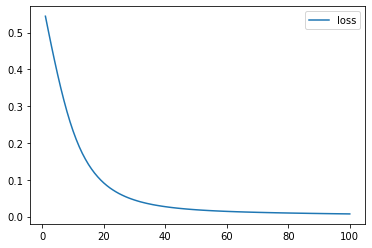

In [83]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

<AxesSubplot:>

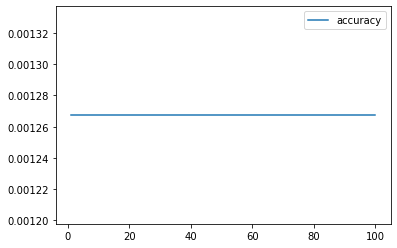

In [52]:
# Plot the accuracy
df_plot.plot(y="accuracy")

In [133]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.0161 - accuracy: 0.0000e+00
Loss: 0.016056545078754425, Accuracy: 0.0


In [134]:
# Define the model with "Hard Sigmoid" activation
number_inputs = 1
number_hidden_nodes = 120

nn_2 = Sequential()
nn_2.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="tanh"))
nn_2.add(Dense(units=1, activation="hard_sigmoid"))

In [135]:
# Compile model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [136]:
# Fit the model
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6263 - accuracy: 0.0038
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.0038
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.0038
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.0038
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.0038
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0038
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0038
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0038
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.0038
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0038
Epoch 11/

In [137]:
# Evaluate the model fit with linear dummy data
model_loss_2, model_accuracy_2 = nn_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss_2}, Accuracy: {model_accuracy_2}")

9/9 - 0s - loss: 0.0377 - accuracy: 0.0000e+00
Loss: 0.037722621113061905, Accuracy: 0.0


## Logistic Regression Model

In [50]:
y = df["pct change"]
X = df.drop(columns="pct change")

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, 
                                                   random_state=1, 
                                                   stratify=y)
X_train.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

## Scoring Sentiment Using RNN LSTM

In [39]:
df = aapl_complete

In [40]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [46]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 5

feature_column = 6
target_column = 6
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[-0.00777008  0.00113218  0.00584299  0.00936944 -0.00027847]
 [ 0.00113218  0.00584299  0.00936944 -0.00027847  0.00622098]
 [ 0.00584299  0.00936944 -0.00027847  0.00622098 -0.02639107]
 [ 0.00936944 -0.00027847  0.00622098 -0.02639107 -0.02246233]
 [-0.00027847  0.00622098 -0.02639107 -0.02246233  0.02229979]] 

y sample values:
[[ 0.00622098]
 [-0.02639107]
 [-0.02246233]
 [ 0.02229979]
 [ 0.02446889]]


In [45]:

#X = aapl_complete["Headline"].values
#y = aapl_sentiment["close"].values

In [25]:
# Create the features set (X) and the target vector (y)
x_cols = [i for i in aapl_complete.columns if i not in ("pct change")]
X = aapl_complete[x_cols]
y = aapl_complete["pct change"]
X

,compound,positive,neutral,negative,sentiment,close
Date,,,,,,
2016-08-30,-0.015205,0.061591,0.883455,0.054955,-0.090909,105.990
2016-08-31,-0.043420,0.070400,0.818600,0.111000,-0.200000,106.110
2016-09-01,0.009625,0.069625,0.897625,0.032750,0.125000,106.730
2016-09-02,-0.087129,0.063143,0.845429,0.091429,-0.285714,107.730
2016-09-06,0.093200,0.131750,0.804500,0.063750,0.250000,107.700
...,...,...,...,...,...,...
2020-11-03,0.181500,0.119000,0.842000,0.038833,0.500000,110.375
2020-11-04,-0.038410,0.078900,0.800900,0.120300,-0.300000,114.940
2020-11-05,0.304967,0.202333,0.747333,0.050333,0.333333,118.990


In [18]:
# Create the train, test, and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [19]:
# Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
# Create an instance of the Tokenizer and fit it with the X text data
#tokenizer = Tokenizer(lower=True)
#tokenizer.fit_on_texts(X)

In [27]:
# Print the first five elements of the encoded vocabulary
#for token in list(tokenizer.word_index)[:5]:
    #print(f"word: '{token}', token: {tokenizer.word_index[token]}")

In [28]:
# Transform the text data to numerical sequences
#X_seq = tokenizer.texts_to_sequences(X)

In [29]:
# Contrast a sample numerical sequence with its text version
#print("**Text comment**")
#print({X[1]})

In [31]:
#print("**Numerical sequence representation**")
#print(X_[0])

In [32]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
# Set the pad size
#max_words = 30

# Pad the sequences using the pad_sequences() method
#X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [34]:
#print(X_pad)

In [35]:
# Creating training, validation, and testing sets using the encoded data
#X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

#X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [36]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [58]:
# Model set-up
#vocabulary_size = len(tokenizer.word_counts.keys()) + 1
#embedding_size = 64

In [81]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
#model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=5))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [82]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [83]:
# Show model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 64)            3328      
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 1400      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 4,734
Trainable params: 4,734
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Training the model
batch_size = 1000
epochs = 10
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.7537 - accuracy: 0.0000e+00 - tp: 1.0000 - tn: 0.0000e+00 - fp: 1.0000 - fn: 0.0000e+00 - precision: 0.5000 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.7529 - val_accuracy: 0.0000e+00 - val_tp: 1.0000 - val_tn: 0.0000e+00 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.7302 - accuracy: 0.0000e+00 - tp: 1.0000 - tn: 0.0000e+00 - fp: 1.0000 - fn: 0.0000e+00 - precision: 0.5000 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.7189 - val_accuracy: 0.0000e+00 - val_tp: 1.0000 - val_tn: 0.0000e+00 - val_fp: 0.0000e+00 - val_fn: 0.0000e+00 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 0.7071 - accuracy: 0.0000e+00 - tp: 1.0000 - tn: 0.0000e+00 - fp: 1.0000 - fn: 0.0000e+00 - precision: 0.5000 - recall: 1

In [85]:
# Predict classes using the testing data
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=1000)

In [86]:
# Accuracy
from sklearn.metrics import accuracy_score

print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

RNN LSTM Accuracy 0.00


In [87]:
# Import the confusion_matrix method from sklearn
from sklearn.metrics import confusion_matrix

In [88]:
# Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y_test_rnn, y_rnn_pred).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

ValueError: too many values to unpack (expected 4)

In [89]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

In [90]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/Users/luisaguilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luisaguilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [92]:
# Making predictions to feed the roc_curve module
test_predictions_rnn = model.predict(X_test_rnn, batch_size=1000)

In [93]:
# Data for ROC Curve - RNN LSTM Model
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn = roc_curve(y_test_rnn, test_predictions_rnn)

In [94]:
# AUC for the RNN LSTM Model
auc_test_rnn = auc(fpr_test_rnn, tpr_test_rnn)
auc_test_rnn = round(auc_test_rnn, 4)

In [95]:
# Dataframe to plot ROC Curve for the RNN LSTM model
roc_df_test_rnn = pd.DataFrame({"FPR Test": fpr_test_rnn, "TPR Test": tpr_test_rnn,})

<AxesSubplot:title={'center':'Test ROC Curve (AUC=1.0)'}, xlabel='FPR Test'>

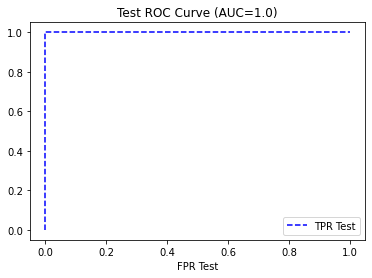

In [96]:
roc_df_test_rnn.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)